### Impoting Libraries

In [51]:
import pickle
import subprocess
import numpy as np
import tqdm.notebook as nb
import matplotlib.pyplot as plt
%matplotlib inline

### Declaring Basic Commands and Variables

##### **W**: Range of width.  
##### **P**: Range of probabilities.  
##### **N**: Iterations per experiment.  

In [37]:
command = "cd Scripts && javac Driver.java && java Driver"

W = np.arange(1, 21)  # From 1 to 20, steps of 1. (20 values)
P = np.arange(0.05, 1, 0.05)  # From 0.05 to 0.95 steps of 0.05. (19 values)
N = 10

print(W, P)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]


In [38]:
def run_experiment(w: int, p: float):
    cmd = command + f' {w} {p}'
    result = subprocess.check_output(cmd, shell=True).decode("utf-8")
    return int(result)

In [44]:
pb = nb.tqdm(total = 4000)

result = []

for w in W:
    temp_p = []
    for p in P:
        temp = 0
        for i in range(N):
            pb.update(n=1)
            temp += run_experiment(w, p)
        temp /= N
        temp_p.append(temp)
    result.append(temp_p)

  0%|          | 0/4000 [00:00<?, ?it/s]

In [50]:
result = pickle.load(open("result.pkl", "rb"))

19

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def f(w, p):
    return 10*w/(1-p**3)

p = np.linspace(0.9, 0.99 , 300)
w = np.linspace(0,50 , 300)

P, W = np.meshgrid(p, w)
Z = f(W, P)
ax = plt.subplot(projection='3d')
ax.contour3D(P, W, Z, 500, cmap='viridis')

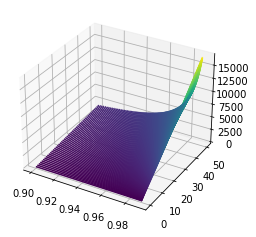